# Keras & CNNs**


In [ ]:
from google.colab import drive; drive.mount('/content/drive')
import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir("/content/drive/My Drive/Colab Notebooks/IDL/Assignment3")

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
import numpy
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
import time
from keras.layers import Dropout
from keras.regularizers import l2
from keras.layers import BatchNormalization 

Loading and reshaping the MNIST data

0


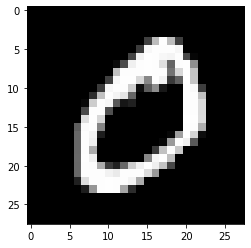

In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_labels[1])
plt.imshow(train_images[1], cmap="Greys_r")

# first difference: data is not reshaped to 784 anymore, but 28x28x1
# note the 1 color channel!! this is important
train_data = tf.data.Dataset.from_tensor_slices(
    (train_images.reshape([-1, 28, 28, 1]).astype(np.float32) / 255, train_labels.astype(np.int32)))
train_data = train_data.shuffle(buffer_size=60000).repeat(2).batch(128)


test_data = tf.data.Dataset.from_tensor_slices(
    (test_images.reshape([-1, 28, 28, 1]).astype(np.float32) / 255, test_labels.astype(np.int32))).batch(128)

#set number of categories
num_classes = 10

Building model MNIST data:

In [ ]:
def train_model_1 (train_steps):
   
    train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

    for step, (image_batch, label_batch) in enumerate(train_data):
        if step > train_steps:
            break

        with tf.GradientTape() as tape:
            logits = model(image_batch)
            # loss format is generally: first argument targets, second argument outputs
            loss = loss_fn(label_batch, logits)

        # if you didn't build the model, it is important that you get the variables
        # AFTER the model has been called the first time
        variables = model.trainable_variables
        gradients = tape.gradient(loss, variables)
          
        optimizer.apply_gradients(zip(gradients, variables))
        
        train_acc_metric(label_batch, logits)
        
        if not step % 100:
            # this is different from before. there, we only evaluated accuracy
            # for one batch. Now, we always average over 100 batches
            print("Loss: {} Accuracy: {}".format(loss, train_acc_metric.result()))
            train_acc_metric.reset_states()

In [ ]:
def train_model_2 (epochs,batch_size):
  for epoch in range(epochs):
      print("\nStart of epoch %d" % (epoch,))
      start_time = time.time()
      train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
      val_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

      # Iterate over the batches of the dataset.
      for step, (x_batch_train, y_batch_train) in enumerate(train_data):
          with tf.GradientTape() as tape:
              logits = model(x_batch_train, training=True)
              loss_value = loss_fn(y_batch_train, logits)
          grads = tape.gradient(loss_value, model.trainable_variables)
          optimizer.apply_gradients(zip(grads, model.trainable_variables))

          # Update training metric.
          train_acc_metric.update_state(y_batch_train, logits)

          # Log every 200 batches.
          if step % 100 == 0:
              print(
                  "Training loss (for one batch) at step %d: %.4f"
                  % (step, float(loss_value))
              )
              print("Seen so far: %d samples" % ((step + 1) * batch_size))

      # Display metrics at the end of each epoch.
      train_acc = train_acc_metric.result()
      print("Training acc over epoch: %.4f" % (float(train_acc),))

      # Reset training metrics at the end of each epoch
      train_acc_metric.reset_states()

      # Run a validation loop at the end of each epoch.
      for x_batch_val, y_batch_val in test_data:
          val_logits = model(x_batch_val, training=False)
          # Update val metrics
          val_acc_metric.update_state(y_batch_val, val_logits)
      val_acc = val_acc_metric.result()
      val_acc_metric.reset_states()
      print("Validation acc: %.4f" % (float(val_acc),))
      print("Time taken: %.2fs" % (time.time() - start_time))

Conv Model for MNIST and Training

In [ ]:
optimizer = tf.optimizers.Adam()
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
#model
model = tf.keras.Sequential()
#1st convolution uhnit: 32 kernel of 3*3 size, activation=ReLU
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=[28, 28, 1]))
#2nd convolution layer: 64 kernel of 3*3 size, activation=ReLU
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3),
                 activation='relu'))
#adding pooling 2*2
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5)) #to avoid overfitting
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

train_model_1 (2500) #Training with training steps

/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


Loss: 2.322927474975586 Accuracy: 0.09375
Loss: 0.10098396241664886 Accuracy: 0.8955468535423279
Loss: 0.08162564039230347 Accuracy: 0.9686718583106995
Loss: 0.029453769326210022 Accuracy: 0.9775781035423279
Loss: 0.0657072588801384 Accuracy: 0.9801562428474426
Loss: 0.003292784560471773 Accuracy: 0.9847656488418579
Loss: 0.06272000074386597 Accuracy: 0.9857031106948853
Loss: 0.08851412683725357 Accuracy: 0.9882031083106995
Loss: 0.03342798352241516 Accuracy: 0.987109363079071
Loss: 0.015821073204278946 Accuracy: 0.9896093606948853


In [ ]:
test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for image_batch, label_batch in test_data:
    test_acc_metric(label_batch, model(image_batch))
print("Test acc: {}".format(test_acc_metric.result()))

Test acc: 0.9876000285148621


# **Working with CIFAR-10 dataset**

Data Distribution
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


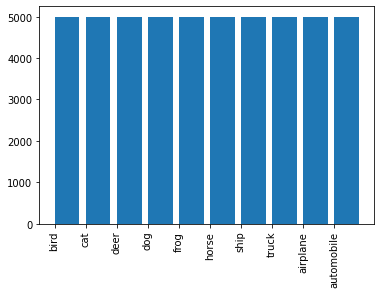

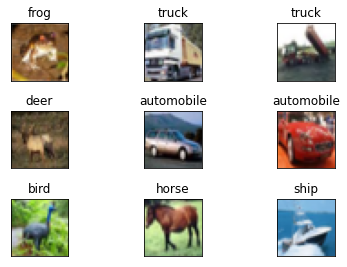

In [ ]:
#Data Preparation and Data Analysis 
CIFAR10 = tf.keras.datasets.cifar10

#Loading Dataset
(train_images, train_labels), (test_images, test_labels) = CIFAR10.load_data()

#Categories
labels_dict = {0 : 'airplane', 1 : 'automobile', 2 : 'bird', 3 : 'cat', 4 : 'deer', 5 :  'dog', 6 : 'frog', 7 : 'horse', 8 : 'ship', 9 : 'truck' }


#Plotting data distribution
print("Data Distribution")
unique, counts = numpy.unique(train_labels, return_counts=True)
labels = [ 'bird', 'cat','deer',  'dog', 'frog',  'horse', 'ship', 'truck','airplane', 'automobile',]
data = dict(zip(labels,counts))
plt.bar(range(len(data)), counts, tick_label=labels,align='edge')
plt.xticks(rotation='vertical')
print('Train: X=%s, y=%s' % (train_images.shape, train_labels.shape))
print('Test: X=%s, y=%s' % (test_images.shape, test_labels.shape))

#Plotting the data 

fig = plt.figure()
for i in range(9):
  label = labels_dict.get(train_labels[i][0], 'default')
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i])
  plt.title("{}".format(label))
  plt.xticks([])
  plt.yticks([])


#Dataset Creation using tf data 
train_data = tf.data.Dataset.from_tensor_slices((train_images.reshape([-1, 32, 32, 3]).astype(np.float32) / 255, train_labels.astype(np.int32)))
train_data = train_data.shuffle(buffer_size=50000).repeat(2).batch(128)
test_data = tf.data.Dataset.from_tensor_slices((test_images.reshape([-1, 32, 32, 3]).astype(np.float32) / 255, test_labels.astype(np.int32))).batch(128)

Custom Model (a part of VGG net) for CIFAR-10

In [ ]:
#set number of categories
num_classes = 10

#model
model = tf.keras.Sequential()

#1st convolution uhnit: 32 kernel of 3*3 size, activation=ReLU
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=[32, 32, 3]))
#adding pooling 2*2
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

#2nd convolution layer: 64 kernel of 3*3 size, activation=ReLU
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3),
                 activation='relu'))
#adding pooling 2*2
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

#3rd convolution layer: 128 kernel of 3*3 size, activation=ReLU
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3),
                 activation='relu'))
#adding pooling 2*2
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5)) #to avoid overfitting
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

#summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

In [ ]:
#train model for CIFAR-10
train_model_1 (2500)

/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


Loss: 2.3072457313537598 Accuracy: 0.125
Loss: 1.6981024742126465 Accuracy: 0.22812500596046448
Loss: 1.5367310047149658 Accuracy: 0.3864062428474426
Loss: 1.6112408638000488 Accuracy: 0.45039063692092896
Loss: 1.3538094758987427 Accuracy: 0.490234375
Loss: 1.3879834413528442 Accuracy: 0.5229687690734863
Loss: 1.2851450443267822 Accuracy: 0.5540624856948853
Loss: 1.0633864402770996 Accuracy: 0.5580468773841858


In [ ]:
#Test for CIFAR-10 
test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for image_batch, label_batch in test_data:
    test_acc_metric(label_batch, model(image_batch))
print("Test acc: {}".format(test_acc_metric.result()))

Test acc: 0.5687999725341797


**Test observations for Custom Model:**

Test1: 2 layers of kernel 3x3 --> Maxpool 2x2 --> dense 256

> *training accuracy:56% & test accuracy: 58%*

Test 2: 2 layers of kernel 3x3 --> Maxpool 2x2 --> dense 512


> Training accuracy:54% & test accuracy 54%

Test 3: 3 layers of kernel operation 3x3 and maxpool after each convolution layer --> dense 512


> Training accuracy 56% & test accuracy 57%









# **Experiments:**

For Further experiments, we have utilised a VGG block


# **Experiment 1: Experimenting with different Optimizers**

Optimisers we worked with : SGD, ADAM, RMSprop

# Exp 1.1  Custom model + SGD Optimizer 

In [ ]:
#Optimiser and Loss Function
optimizer = SGD(learning_rate=0.001, momentum=0.9)
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

#training 
train_model_2 (5,128)


Start of epoch 0


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


Training loss (for one batch) at step 0: 2.3119
Seen so far: 128 samples
Training loss (for one batch) at step 100: 1.9286
Seen so far: 12928 samples
Training loss (for one batch) at step 200: 1.8296
Seen so far: 25728 samples
Training loss (for one batch) at step 300: 1.6343
Seen so far: 38528 samples
Training loss (for one batch) at step 400: 1.7451
Seen so far: 51328 samples
Training loss (for one batch) at step 500: 1.4885
Seen so far: 64128 samples
Training loss (for one batch) at step 600: 1.5776
Seen so far: 76928 samples
Training loss (for one batch) at step 700: 1.6225
Seen so far: 89728 samples
Training loss (for one batch) at step 800: 1.5870
Seen so far: 102528 samples
Training loss (for one batch) at step 900: 1.4181
Seen so far: 115328 samples
Training acc over epoch: 0.4152
Validation acc: 0.4957
Time taken: 338.97s

Start of epoch 1
Training loss (for one batch) at step 0: 1.4155
Seen so far: 128 samples
Training loss (for one batch) at step 100: 1.2690
Seen so far: 129

In [ ]:
#testing for SGD Optimizer 

test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for image_batch, label_batch in test_data:
    test_acc_metric(label_batch, model(image_batch))
print("Test acc: {}".format(test_acc_metric.result()))

Test acc: 0.6256999969482422


# Exp 1.2   Custom model + Adam Optimizer 

In [ ]:
optimizer = tf.optimizers.Adam()
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

#model 
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))


train_model_2(5,128) #Training


Start of epoch 0


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


Training loss (for one batch) at step 0: 7.5137
Seen so far: 128 samples
Training loss (for one batch) at step 100: 1.7004
Seen so far: 12928 samples
Training loss (for one batch) at step 200: 1.3516
Seen so far: 25728 samples
Training loss (for one batch) at step 300: 1.5171
Seen so far: 38528 samples
Training loss (for one batch) at step 400: 0.9402
Seen so far: 51328 samples
Training loss (for one batch) at step 500: 1.3761
Seen so far: 64128 samples
Training loss (for one batch) at step 600: 0.9737
Seen so far: 76928 samples
Training loss (for one batch) at step 700: 1.0625
Seen so far: 89728 samples
Training acc over epoch: 0.5359
Validation acc: 0.6187
Time taken: 392.61s

Start of epoch 1
Training loss (for one batch) at step 0: 1.2436
Seen so far: 128 samples
Training loss (for one batch) at step 100: 0.9081
Seen so far: 12928 samples
Training loss (for one batch) at step 200: 1.0084
Seen so far: 25728 samples
Training loss (for one batch) at step 300: 0.9223
Seen so far: 38528

In [ ]:
#testing for adam optimizer 

test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for image_batch, label_batch in test_data:
    test_acc_metric(label_batch, model(image_batch))
print("Test acc: {}".format(test_acc_metric.result()))

Test acc: 0.6607000231742859


# Exp 1.2   Custom model + RMSprop Optimizer 

In [ ]:

loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.1)

#model 
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))


train_model_2(5,128)


Start of epoch 0


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


Training loss (for one batch) at step 0: 2.3699
Seen so far: 128 samples
Training loss (for one batch) at step 100: 2.2349
Seen so far: 12928 samples
Training loss (for one batch) at step 200: 2.3127
Seen so far: 25728 samples
Training loss (for one batch) at step 300: 2.3122
Seen so far: 38528 samples
Training loss (for one batch) at step 400: 2.3121
Seen so far: 51328 samples
Training loss (for one batch) at step 500: 2.3271
Seen so far: 64128 samples
Training loss (for one batch) at step 600: 2.2991
Seen so far: 76928 samples
Training loss (for one batch) at step 700: 2.3108
Seen so far: 89728 samples
Training acc over epoch: 0.1062
Validation acc: 0.1000
Time taken: 338.99s

Start of epoch 1
Training loss (for one batch) at step 0: 2.3088
Seen so far: 128 samples
Training loss (for one batch) at step 100: 2.3131
Seen so far: 12928 samples
Training loss (for one batch) at step 200: 2.3003
Seen so far: 25728 samples
Training loss (for one batch) at step 300: 2.3148
Seen so far: 38528

# **Test observations for optimizers**

Epochs = 5, Batch Size = 128

Test1: SGD Optimizer 

> *training accuracy:66.09% & test accuracy: 62.5%

Test 2: ADAM Optimizer

> Training accuracy:85.84% & test accuracy 66.07%

Test 3: RMSprop optimizer


> Training accuracy 10% & test accuracy 10%

Although, we got the best test accuracy for ADAM optimiser, considering the difference between the test and training accuracy, its clear that, there is overfitting. In the following sections, we have tried experiments to reduce the overfitting. 

# **Experiment 2: Experiments to reduce overfitting**

Methods adopted: Dropout Layer, Batch Normalization, Weight Decay 

# Exp 2.1   Custom model with ADAM optimizer and dropout layers 

In [ ]:

optimizer = tf.optimizers.Adam()
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2)) #20 percent dropout
model.add(Dense(10, activation='softmax'))

train_model_2 (5,128)


Start of epoch 0


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


Training loss (for one batch) at step 0: 2.4486
Seen so far: 128 samples
Training loss (for one batch) at step 100: 1.5876
Seen so far: 12928 samples
Training loss (for one batch) at step 200: 1.4701
Seen so far: 25728 samples
Training loss (for one batch) at step 300: 1.3485
Seen so far: 38528 samples
Training loss (for one batch) at step 400: 1.2107
Seen so far: 51328 samples
Training loss (for one batch) at step 500: 1.1147
Seen so far: 64128 samples
Training loss (for one batch) at step 600: 1.3436
Seen so far: 76928 samples
Training loss (for one batch) at step 700: 1.0103
Seen so far: 89728 samples
Training acc over epoch: 0.4951
Validation acc: 0.6339
Time taken: 390.01s

Start of epoch 1
Training loss (for one batch) at step 0: 1.0536
Seen so far: 128 samples
Training loss (for one batch) at step 100: 0.9631
Seen so far: 12928 samples
Training loss (for one batch) at step 200: 1.1246
Seen so far: 25728 samples
Training loss (for one batch) at step 300: 0.8903
Seen so far: 38528

In [ ]:
test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for image_batch, label_batch in test_data:
    test_acc_metric(label_batch, model(image_batch))
print("Test acc: {}".format(test_acc_metric.result()))

Test acc: 0.6819999814033508


# Exp 2.2   Custom model with ADAM optimizer and weight Decay 

In [ ]:
#In this section, we have used a weight decay to avoid the overfitting overserved in the baseline

#Optimiser and Loss Function
optimizer = tf.optimizers.Adam()
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=l2(0.001)))
model.add(Dense(10, activation='softmax'))

train_model_2 (5,128)


Start of epoch 0


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


Training loss (for one batch) at step 0: 2.6534
Seen so far: 128 samples
Training loss (for one batch) at step 100: 1.5958
Seen so far: 12928 samples
Training loss (for one batch) at step 200: 1.3244
Seen so far: 25728 samples
Training loss (for one batch) at step 300: 1.1655
Seen so far: 38528 samples
Training loss (for one batch) at step 400: 1.2112
Seen so far: 51328 samples
Training loss (for one batch) at step 500: 1.0835
Seen so far: 64128 samples
Training loss (for one batch) at step 600: 0.8673
Seen so far: 76928 samples
Training loss (for one batch) at step 700: 1.0028
Seen so far: 89728 samples
Training acc over epoch: 0.5637
Validation acc: 0.6413
Time taken: 326.90s

Start of epoch 1
Training loss (for one batch) at step 0: 0.8427
Seen so far: 128 samples
Training loss (for one batch) at step 100: 0.7695
Seen so far: 12928 samples
Training loss (for one batch) at step 200: 0.8609
Seen so far: 25728 samples
Training loss (for one batch) at step 300: 0.8927
Seen so far: 38528

# **Test observations for dropout layers and weight decay**

Epochs = 5, Batch Size = 128

Test1: Dropout Layers  

> *training accuracy:74.6% & test accuracy: 68.2%

Test 2:  Weight Decay

> Training accuracy:86.66% & test accuracy: 66.9%


It can be observed above that weight decay did not contribute much to the reduction of overfitting(for the number of epochs and batch size) whereas using dropout layers has significantly reduced the overfitting, hence in the following section we have combined batch normalization with dropout layer to observe if it could contribute to further reduction in overfitting. 

# Exp 2.3   Custom model with ADAM optimizer, dropout layers and batch normalization

In [ ]:
optimizer = tf.optimizers.Adam()
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
 
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
 
train_model_2 (5,128)


Start of epoch 0


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


Training loss (for one batch) at step 0: 3.0577
Seen so far: 128 samples
Training loss (for one batch) at step 100: 1.5211
Seen so far: 12928 samples
Training loss (for one batch) at step 200: 1.1060
Seen so far: 25728 samples
Training loss (for one batch) at step 300: 1.2439
Seen so far: 38528 samples
Training loss (for one batch) at step 400: 1.0224
Seen so far: 51328 samples
Training loss (for one batch) at step 500: 1.0829
Seen so far: 64128 samples
Training loss (for one batch) at step 600: 1.0676
Seen so far: 76928 samples
Training loss (for one batch) at step 700: 0.9349
Seen so far: 89728 samples
Training acc over epoch: 0.5854
Validation acc: 0.6518
Time taken: 439.73s

Start of epoch 1
Training loss (for one batch) at step 0: 0.9646
Seen so far: 128 samples
Training loss (for one batch) at step 100: 0.8443
Seen so far: 12928 samples
Training loss (for one batch) at step 200: 0.8559
Seen so far: 25728 samples
Training loss (for one batch) at step 300: 0.8011
Seen so far: 38528

# **Test observations for Exp 2.3**

Epochs = 5, Batch Size = 128

> *training accuracy:90% & test accuracy: 67.6%


Introducting the batch normalisation, has increased the overfitting, simple model could be one of the reason for this kind of result. 


# **Experiment 3: Experimenting with different kernel sizes**

In this section, we oberved the model summary to understand, how changing the kernel size could change the size and number of feature maps 

In [ ]:
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

model = Sequential()
model.add(Conv2D(32, (1, 1), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (1, 1), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        1056      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 1,051,178
Trainable params: 1,051,178
Non-trainable params: 0
____________________________________________

In [ ]:
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

model = Sequential()
model.add(Conv2D(32, (32, 32), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (1, 1), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((1, 1)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 1, 1, 32)          98336     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 1, 1, 32)          1056      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 104,906
Trainable params: 104,906
Non-trainable params: 0
________________________________________________

# **Test observations for Exp 3**

1.   When we changed the input kernel size to (1,1), the total numbe of parameters increased because, all the features were passed from one layer to another without choosing anything unique.
2.   When we changed the kernel size to (32,32) same size as input, the output shape of layer 1 was (1,1,32) (32 being number of filters in first layer, alhough the number of parameters reduced, the learning was very poor due to filtering all the features in the first layer. 


# **Visualizing Feature Maps**

In [ ]:

from matplotlib import pyplot
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
from keras.preprocessing.image import img_to_array
# summarize feature map shapes
for i in range(len(model.layers)):
	layer = model.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# summarize output shape
	print(i, layer.name, layer.output.shape)

0 conv2d_31_input (None, 32, 32, 3)
1 conv2d_31 (None, 32, 32, 32)


In [ ]:
# redefine model to output right after the first hidden layer
ixs = [1,3]
outputs = [model.layers[i+1].output for i in ixs]
modelVis = Model(inputs=model.inputs, outputs=outputs)
modelVis.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33_input (InputLayer) [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 32)        0         
Total params: 10,400
Trainable params: 10,272
Non-trainable params: 128
_____________________________________________________

Input Image


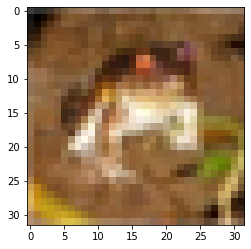

In [ ]:
# load the image with the required shape
img = train_images[0]
print("Input Image")
plt.imshow(img)
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)

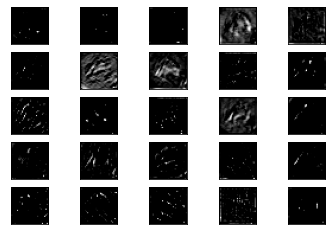

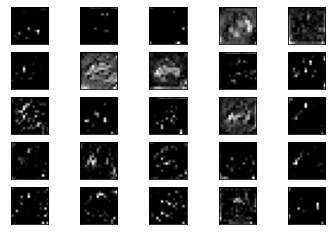

In [ ]:
# get feature map for first hidden layer
feature_maps = modelVis.predict(img)
# plot all 64 maps in an 8x8 squares
square = 5
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	# show the figure
	pyplot.show()